In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\luyil\ihealth\datasets\preproc\seniors_data.csv")
data.shape

(2469827, 28)

In [4]:
data.dtypes

Unnamed: 0.1                 int64
Unnamed: 0                   int64
payer                       object
insurer_paid_amt_mean      float64
insurer_paid_amt_sum       float64
member_paid_amt_mean       float64
member_paid_amt_sum        float64
total_paid_amt_mean        float64
total_paid_amt_sum         float64
service_year               float64
county_code                float64
county_name                 object
age_group_code             float64
age_group_name              object
sex                         object
unique_member_cnt          float64
svc_code_ctg_desc           object
clm_cnt                    float64
member_months              float64
total_paid_amt_median      float64
insurer_paid_amt_median    float64
member_paid_amt_median     float64
service                     object
insurer_paid_sum_prop      float64
insurer_paid_mean_prop     float64
member_paid_sum_prop       float64
member_paid_mean_prop      float64
average_ops_cnt            float64
dtype: object

In [7]:
prop_data = data.groupby("county_name")["member_paid_mean_prop"].mean()

In [8]:
prop_data

county_name
Aitkin             0.122734
Anoka              0.089202
Becker             0.109000
Beltrami           0.119205
Benton             0.097360
                     ...   
Watonwan           0.117150
Wilkin             0.109789
Winona             0.124708
Wright             0.098258
Yellow Medicine    0.114706
Name: member_paid_mean_prop, Length: 87, dtype: float64

In [9]:
sorted_data = prop_data.sort_values()
sorted_data

county_name
Hennepin    0.088195
Ramsey      0.088655
Anoka       0.089202
Red Lake    0.093234
Dakota      0.096739
              ...   
Nobles      0.129467
Jackson     0.130288
Lyon        0.130635
Brown       0.130854
Mower       0.147920
Name: member_paid_mean_prop, Length: 87, dtype: float64

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
print(sorted_data)

county_name
Hennepin    0.088195
Ramsey      0.088655
Anoka       0.089202
Red Lake    0.093234
Dakota      0.096739
              ...   
Nobles      0.129467
Jackson     0.130288
Lyon        0.130635
Brown       0.130854
Mower       0.147920
Name: member_paid_mean_prop, Length: 87, dtype: float64


In [11]:
sorted_data.dtypes

dtype('float64')

In [15]:
pd.set_option('display.max_rows', None)
sorted_data

county_name
Hennepin             0.088195
Ramsey               0.088655
Anoka                0.089202
Red Lake             0.093234
Dakota               0.096739
Benton               0.097360
Rice                 0.097646
Isanti               0.097798
Meeker               0.098252
Wright               0.098258
Sibley               0.099755
Scott                0.100309
Saint Louis          0.100940
Sherburne            0.101676
Carver               0.102132
Roseau               0.102986
Mille Lacs           0.103290
Kandiyohi            0.104103
Chisago              0.104822
Clearwater           0.104911
Chippewa             0.105713
Norman               0.106418
Swift                0.107412
Grant                0.107741
Carlton              0.107916
Waseca               0.108015
Blue Earth           0.108149
Steele               0.108152
Cook                 0.108540
Traverse             0.108737
Stearns              0.108842
Becker               0.109000
Washington           0.10922

<Figure size 1500x1000 with 0 Axes>

<Axes: xlabel='county_name'>

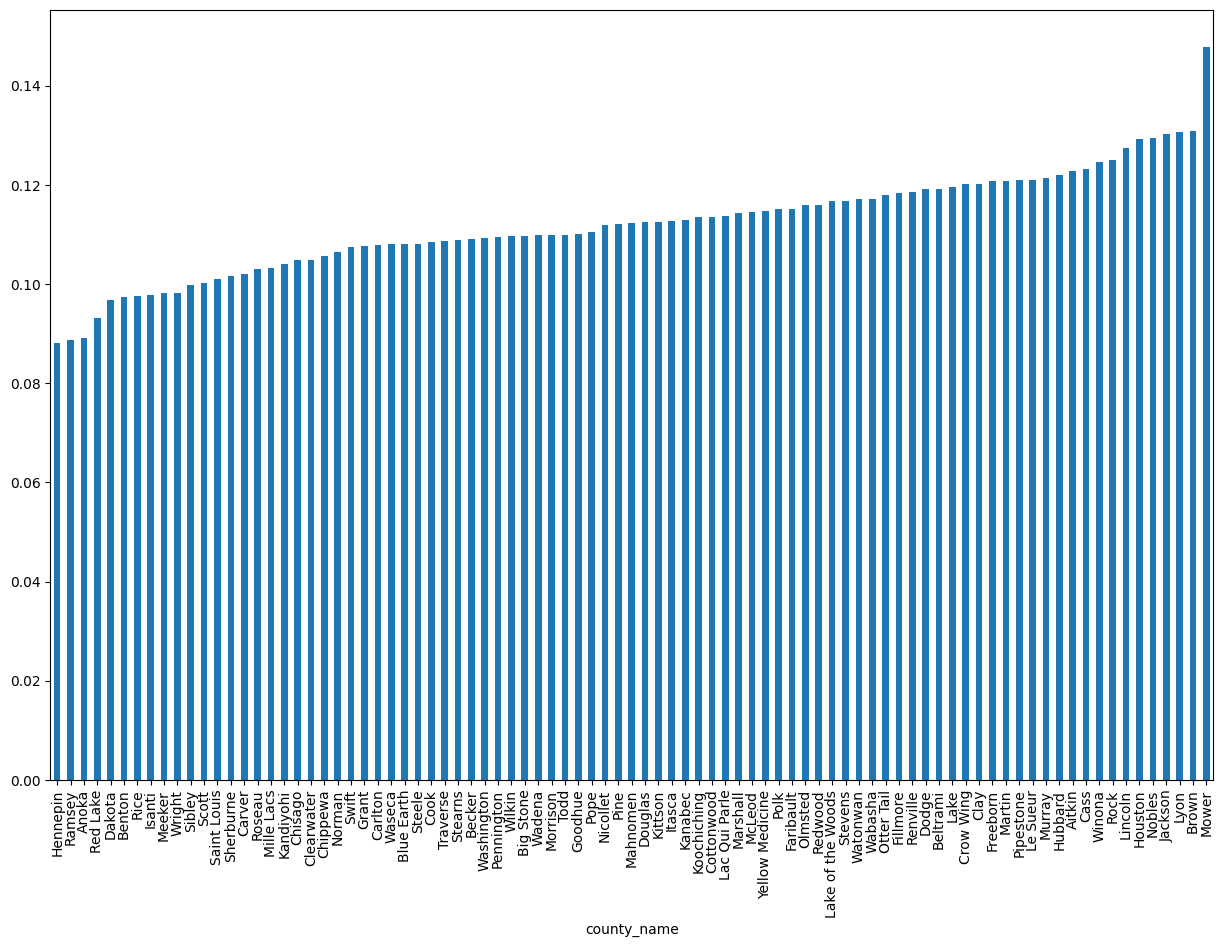

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sorted_data.plot(kind='bar')

# 显示图表
plt.show()

In [20]:
import plotly.express as px
counties_geojson = r"C:\Users\luyil\ihealth\MN.geo.json"
data = sorted_data.reset_index()
data.columns = ['county_name', 'income']
# 使用Plotly绘制地图，假设你的数据是美国的县
fig = px.choropleth(data_frame=data,
                    geojson=counties_geojson,  # 这里需要一个包含县边界的GeoJSON文件
                    locations='county_name',  # DataFrame中指向地理位置的列
                    featureidkey="properties.name",  # GeoJSON的特征键，用于匹配DataFrame中的位置
                    color='income',  # 根据哪个列来分配颜色
                    scope="usa")

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed